<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [9]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

In [10]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [11]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [12]:
dataset[:5]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN
3,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Comisaría,NaN,"Mala alimentación, Malas condiciones de alojam...",NaN,Alejamiento de vínculos,NaN,NaN,NaN,Policia Provincial,Comisaria Nº 3 de Rafael Castillo,NaN
4,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [15]:
import six
def convert_to_int(row):
    try:
        return int(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return int(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [16]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

## Solución del Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

In [17]:
# Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’
fdps = dataset.year.dropna().value_counts(normalize=True)
fdps_frame = fdps.to_frame().reset_index()
fdps_frame

,index,year
0,2016.0,0.225684
1,2013.0,0.216565
2,2014.0,0.183131
3,2017.0,0.177812
4,2015.0,0.066109
5,2012.0,0.047112
6,2010.0,0.015957
7,2011.0,0.012158
8,2009.0,0.007599
9,2003.0,0.006839


* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

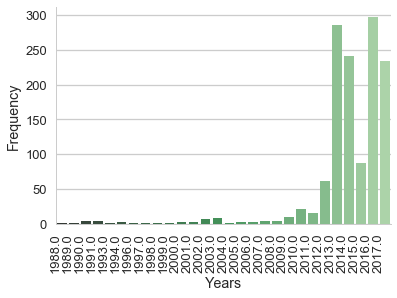

In [18]:
# Punto A: Crear una imagen mostrando la distribución de los eventos por año
dst = dataset.year.dropna().value_counts(normalize=False)
ax = seaborn.barplot(data=dst.to_frame().reset_index(), 
                     x='index', y='year', color='#2ecc71', palette="Greens_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xlabel('Years')
ax.set_ylabel('Frequency')
seaborn.despine()

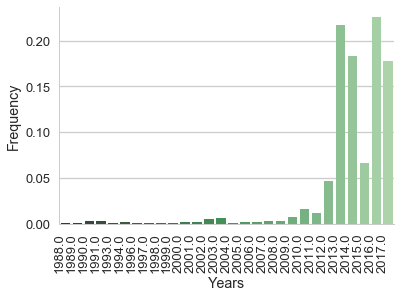

In [19]:
# Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.
ax = seaborn.barplot(data=fdps_frame, x='index', y='year', color='#2ecc71', palette="Greens_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xlabel('Years')
ax.set_ylabel('Frequency')
seaborn.despine()

#### ¿Son ambos gráficos iguales?
Ambos gráficos son distintos, el primero representa el número de eventos por año
y el segundo representa la frecuencia de eventos por años.
#### ¿Cuál considera que es más útil?
El segundo gráfico es más útil ya que ahora las barras tendrán siempre superficie
igual a la frecuencia relativa y la suma de todas esas superficies (de todas las barras) 
será 1, o sea el 100%.
#### ¿A qué se debe la forma de la distribución?
    
#### ¿Qué tendencia muestra?
La distribución muestra una tendencia al alza desde el comienzo de toma de datos hasta
los años actuales.
#### ¿Ha aumentado la violencia institucional en los últimos años?
En los ultimos años se observa un claro aumento de la violencia institucional

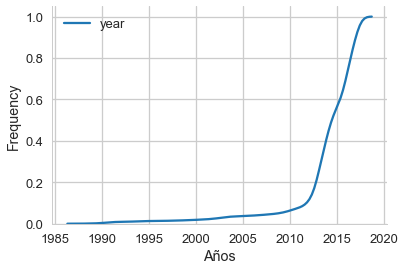

In [20]:
# Calcular la función de distribución acumulada de la variable Y y graficarla.

ax = seaborn.kdeplot(dataset.year.dropna(), cumulative=True)
ax.set_xlabel('Años')
ax.set_ylabel('Frequency')
seaborn.despine()

#### ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?
La probabilidad de que se haya dedo un acto de violencia institucional antes del cambio de gobierno
es del 60%.

## Solución del Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

In [21]:
# Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’
fdps = dataset.provincia.dropna().value_counts(normalize=True)
fdps.to_frame()

,provincia
Buenos Aires,0.693182
Ciudad de Buenos Aires,0.083097
Córdoba,0.036932
Chubut,0.026278
Chaco,0.020597
Rio Negro,0.019176
Neuquen,0.014915
Santa Fe,0.014205
Mendoza,0.012074
Salta,0.012074


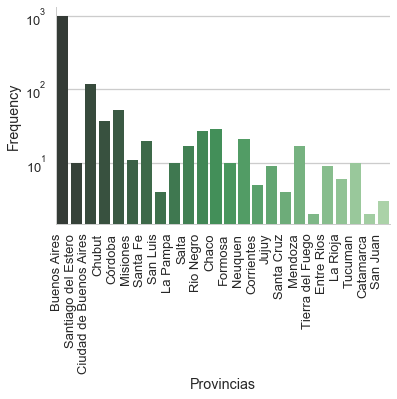

In [22]:
# Muestre la distribución de los eventos visualmente.
ax = seaborn.countplot(x="provincia", data=dataset, palette="Greens_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_yscale('log')
ax.set_xlabel('Provincias')
ax.set_ylabel('Frequency')
seaborn.despine()

#### ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
Para mostrar de una forma más adecuada la información es bueno usar una escala logarítmica
#### ¿Qué tipo de gráfico es más adecuado para mostrar esta información?
Para esta representar la distribución de los eventos por provincia usamos un diagrama de barras

## Solución del Ejercicio 3
Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores. 

In [23]:
cross_table = pandas.crosstab(index=dataset.year, columns=dataset['provincia'], margins=True, normalize=True)
cross_table

provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad de Buenos Aires,Corrientes,Córdoba,Entre Rios,Formosa,Jujuy,...,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucuman,All
year,,,,,,,,,,,,,,,,,,,,,
1988.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766
1989.0,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766
1990.0,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003831
1991.0,0.002299,0.000000,0.000000,0.000000,0.001533,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003831
1993.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001533,0.000000,0.000000,0.000000,0.000000,0.000000,0.001533
1994.0,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.002299
1996.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766
1997.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766
1998.0,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001533


Me a parecido que el diagrama mas apropiado para representar los datos de ambas distribuciones es un mapa de calor.
Se a tomado esta decision ya que la variable provincia es categorica y no se puede relacionar con una variable cuantitativa discreta como es el año. 
Viendo el mapa se puede observar que los datos de las distribuciones estan dispersos y no siguen ningun tipo de patrón, por lo tanto, podemos decir que no existe relación entre ambas variables.

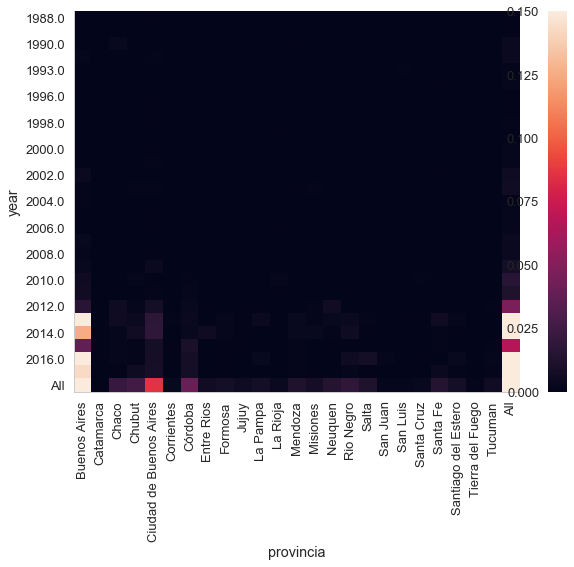

In [24]:
# Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.
plt.subplots(figsize=(10, 7))
seaborn.heatmap(cross_table, vmax=.15, vmin=0)
seaborn.despine()

## Solución del Ejercicio 4:

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [25]:
def añadir_dependencias_seguridad(row):
    row = str(row)
    if "Penal" in row or "Comisaría" in row or "Gendarmería" in row \
        or "Centros" in row or "Seguridad" in row or "Fuerzas" in row:
        return row
    
# Acá creamos un array que contiene todas las dep. de fzas. de seguridad    
arr = pandas.Series([string for string in dataset['contexto1'].drop_duplicates()])
r = arr.apply(añadir_dependencias_seguridad)
dependencias = r.dropna().as_matrix()

# Aca obtenemos el número de filas de dependencias de fuerzas de seguridad
n_dep = 0
for i in range(len(dependencias)):
    n_dep += len(dataset[dataset.contexto1 == dependencias[i]])

#Acá obtenemos el número de filas totales sin las NaN
n_tot = len(dataset)

# Acá obtenemos la probabilidad de que el hecho de violencia ocurra en 
# una dependencia de las fuerzas de seguridad

'La probabilidad de hecho de violencia provocado por fuerzas de seguridad es del {:.2%}'.format(n_dep / n_tot)

'La probabilidad de hecho de violencia provocado por fuerzas de seguridad es del 78.18%'

## Solución del Ejercicio 5:

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

In [27]:
# Probabilidad de sufrir violencia física P(M) = nª casos violencia física / nª casos totales
PM = dataset.violencia_fisica.count() / len(dataset)
# Probabilidad de violencia psíquica y física M P(M ^ N) = nº casos violencia psíquica en N / nº casos violencia totales
PMyN = len(dataset.loc[:, ['violencia_fisica', 'violencia_psiquica']].dropna()) / len(dataset)
# P(N | M) = P(M ^ N) / P(M)
PN_ocurrido_M = PMyN / PM
'La probabilidad de hecho de violencia psíquica ocurrieldo violencia física es del {:.2%}'.format(PN_ocurrido_M)

'La probabilidad de hecho de violencia psíquica ocurrieldo violencia física es del 21.36%'

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [30]:
PN = dataset.violencia_psiquica.count() / len(dataset)
# Si se cumple la siguiente propiedad entonces ambos eventos serán independientes:
"¿Son ambos eventos independientes? {0}".format('Si' if PMyN == PM * PN else 'No')

'¿Son ambos eventos independientes? No'